# Restaurant Recommendation

In [15]:
import requests
from bs4 import BeautifulSoup

In [210]:
response = requests.get("https://www.yelp.com/search?find_desc=Restaurants&find_loc=64468&l=g%3A-94.9277114868164%2C40.29235856621275%2C-94.82540130615234%2C40.37087419654953")

In [211]:
soup = BeautifulSoup(response.content, "html.parser")

In [232]:
card_divs = soup.find_all('div', class_='css-33bb9k', attrs={'data-testid': 'serp-ia-card'})


In [213]:

business_ratings = {}
business_review_urls = {}

base_url = "https://www.yelp.com"

for card_div in card_divs:
    # Extract business name
    name = card_div.find('a', class_='css-19v1rkv').text.strip()
    print("Business Name:", name)
    more_span = card_div.find('span', class_='css-1wayfxy')
    if more_span:
        more_link = more_span.find('a')
        if more_link:
            review_url = more_link['href']
            full_review_url = base_url +  review_url
            print("Link to full review:", full_review_url)
            business_review_urls[name] = full_review_url

    # Find the total ratings
    total_ratings_element = card_div.find('span', class_='css-gutk1c')
    if total_ratings_element:
        total_ratings = total_ratings_element.text.strip()
        print("Total Ratings:", total_ratings)
    else:
        total_ratings = 0
        print("Total Ratings", total_ratings)
        print("Total Ratings not found")

    business_ratings[name] = total_ratings

    print()  

Business Name: A&G Restaurant
Link to full review: https://www.yelp.com/biz/a-and-g-restaurant-maryville?hrid=6HiKKch4iVUvNLQrsl_RiA&osq=Restaurants
Total Ratings: 3.9

Business Name: Pagliai’s Pizza
Link to full review: https://www.yelp.com/biz/pagliais-pizza-maryville?hrid=4uXy43ISkUhRy5sSwoSCXQ&osq=Restaurants
Total Ratings: 4.3

Business Name: El Maguey
Link to full review: https://www.yelp.com/biz/el-maguey-maryville?hrid=4UU6TDsOrjKv9X7ny8Lwdw&osq=Restaurants
Total Ratings: 4.2

Business Name: Nopal Mexican Restaurant
Link to full review: https://www.yelp.com/biz/el-nopal-mexican-restaurant-5-maryville?hrid=_-reqRb7QvUrgXM3wihN-Q&osq=Restaurants
Total Ratings: 4.8

Business Name: Joy Wok Super Buffet & Sushi
Link to full review: https://www.yelp.com/biz/joy-wok-super-buffet-and-sushi-maryville?hrid=hGAtxxIO8-Ppu5Owg7pr_w&osq=Restaurants
Total Ratings: 2.7

Business Name: Simply Siam
Link to full review: https://www.yelp.com/biz/simply-siam-maryville-2?hrid=rVrbr1EiprHQX2ecKw2oMw&

C:\Users\s556160\AppData\Local\Temp\ipykernel_3804\2704247490.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=business_names_sorted, y=ratings_sorted, palette='viridis', legend=False)


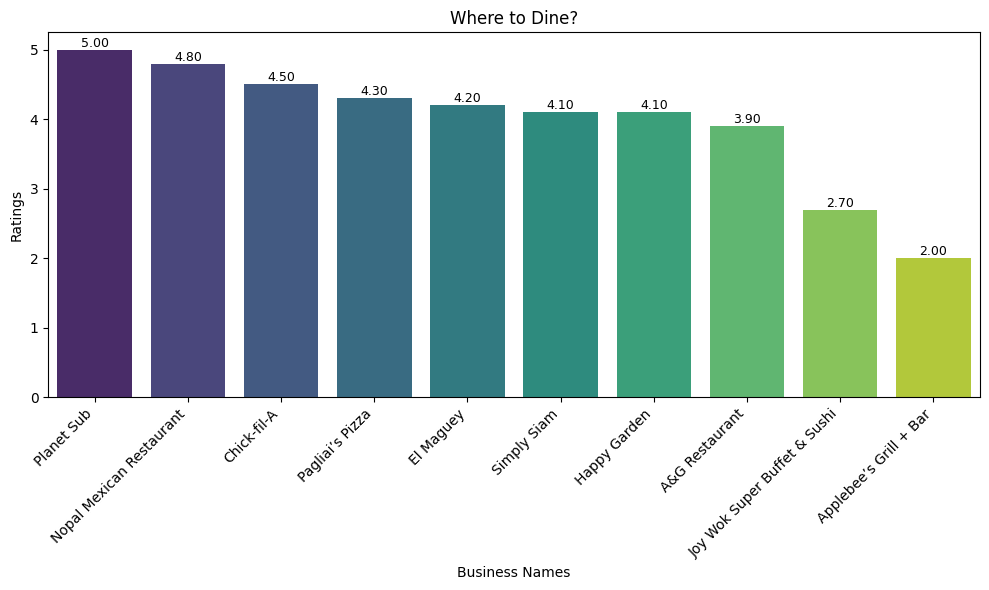

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract business names and ratings from the dictionary
business_names = list(business_ratings.keys())
ratings = [float(rating) for rating in business_ratings.values()]

# Sort business names and ratings based on ratings
sorted_data = sorted(zip(business_names, ratings), key=lambda x: x[1], reverse=True)
business_names_sorted, ratings_sorted = zip(*sorted_data)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=business_names_sorted, y=ratings_sorted, palette='viridis', legend=False)

for i, rating in enumerate(ratings_sorted):
    ax.text(i, rating, f'{rating:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Business Names')
plt.ylabel('Ratings')
plt.title('Where to Dine?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
